In [1]:
import pickle
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import  functools
import math
import numpy as np
import os
from decimal import Decimal

In [2]:
import operator as op
def nCr(n,r):
    f = math.factorial
    return Decimal(f(n)) / (Decimal(f(r)) * Decimal(f(n-r)))

def calculatep(N,k,pi):
    return nCr(N-1,k)*Decimal(pow(pi,k))*Decimal(pow(1-pi,N-1-k))


def setplot(plt):
   
    ax = plt.subplot(111) 

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt


In [9]:
targetDict={"NA/1":"1987-1989","NA/2":"2001-2003","NA/3":"2008-2010","NA/4":"2014-2016",}

target="NA/2"
endyear='2003'
targetWrite=targetDict[target]

G=pickle.load(open('{}/Graph.pickle'.format(target),"rb"))
waveMatrix=pickle.load(open('{}/waveMatrix.pickle'.format(target),"rb"))
skip=pickle.load(open('{}/skip.pickle'.format(target),"rb"))
nodeNames=pickle.load(open('{}/Correlations/o3/{}/nodeNames.pickle'.format(target,endyear),"rb"))

In [10]:
networkDetails=open('{}/CorrelationSummary/networkfeautures.csv'.format(target),'r').readline().strip().split(',')

In [11]:
try:
    cluster=pickle.load(open('{}/cluster.pickle'.format(target),'rb'))
    degree=pickle.load(open('{}/degree.pickle'.format(target),'rb'))
except:
    cluster=nx.clustering(G,weight='weight')
    degree=nx.degree(G,weight='weight')
    pickle.dump(cluster,open('{}/cluster.pickle'.format(target),'wb'))
    pickle.dump(degree,open('{}/degree.pickle'.format(target),'wb'))
    
kmean=float(networkDetails[3])
pi=float(networkDetails[-2])
N=len(degree)
Cavg=float(networkDetails[-1])

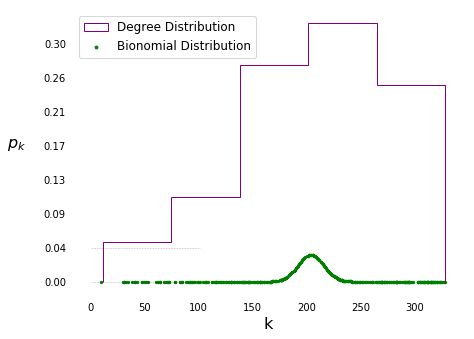

In [29]:
#Figure 1 A Replication
plt.close()

plt.figure(figsize=(7, 5.25))    
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#for i in degree:
#plt.scatter([i[1] for i in degree])
n,bins,_=plt.hist([i[1] for i in degree],bins=5,histtype='step',color='purple',label='Degree Distribution')
n=[int(i) for i in n]
temp=[]
for key in degree:
    k=int(key[1])
    p=calculatep(N,k,pi)*N
    temp.append(p)
    plt.scatter(k,p,color='g',s=5)
plt.scatter(k,p,color='g',s=8,label='Bionomial Distribution')    
gap=7*4
plt.yticks([i for i in np.arange(0.0,max(n),gap)],["{0:.2f}".format(i/N) for i in np.arange(0,max(n),gap)])
# plt.xticks(fontsize=14)
# plt.xlim(0,102)
# plt.ylim(-0.1,44.0)
for y in range(0, 44, gap):     
    plt.plot(range(0, 102), [y] * len(range(0, 102)), "--", lw=0.5, color="black", alpha=0.3)

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.legend(loc='upper left',prop={'size': 12})
plt.ylabel('$p_{k}$          ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
#plt.savefig("Com/images/DegreeDistribution1.png",bbox_inches='tight')
plt.show()

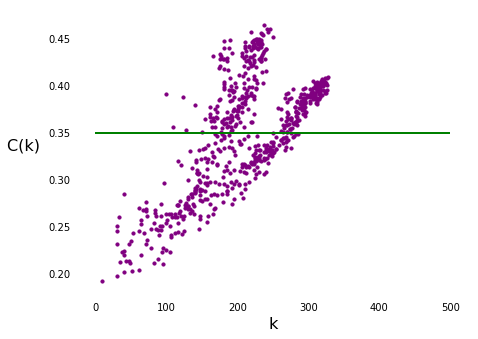

In [30]:
# Figure 1 B
plt.close()
plt.figure(figsize=(7, 5.25))    
plt=setplot(plt)
N=len(degree)

for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,500,color='g',linewidth=0.3)
    plt.scatter(k,cc,color='purple',s=10)
    

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)


plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
#plt.savefig("Com/images/clusteringcoefficient3.png",bbox_inches='tight')
plt.show()

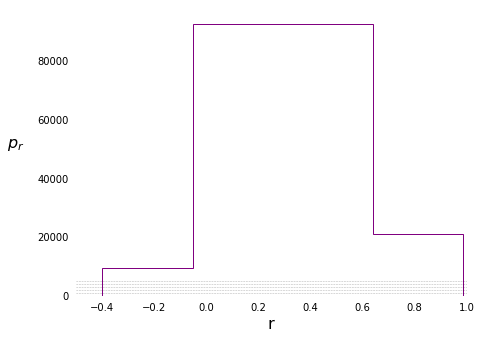

In [32]:
# Figure 1 C
temp=[]
for i in range(len(waveMatrix)):
    for j in range(i+1,len(waveMatrix)):
        x,y=nodeNames[i],nodeNames[j]
        if x not in skip and y not in skip:
            temp.append(waveMatrix[i,j])
            
plt.close()
plt.figure(figsize=(7, 5.25))    
plt=setplot(plt)
plt.hist(temp,bins=4,histtype='step',color='purple')
plt.xlim(-0.5,1.0)
# plt.ylim(0,6000)
for y in range(0, 6000, 1000):     
    plt.plot(range(-1, 2), [y] * len(range(-1, 2)), "--", lw=0.5, color="black", alpha=0.3)

N=len(waveMatrix)
gap=100
#plt.yticks([i for i in np.arange(0,7000,gap)],["{0:.02f}".format(i/15753) for i in range(0,7000,gap)])
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('$p_{r}$        ',fontsize=16,rotation=0)
plt.xlabel("r",fontsize=16)
#plt.savefig("Com/images/correlationDistribution.png",bbox_inches='tight')
plt.show()

0


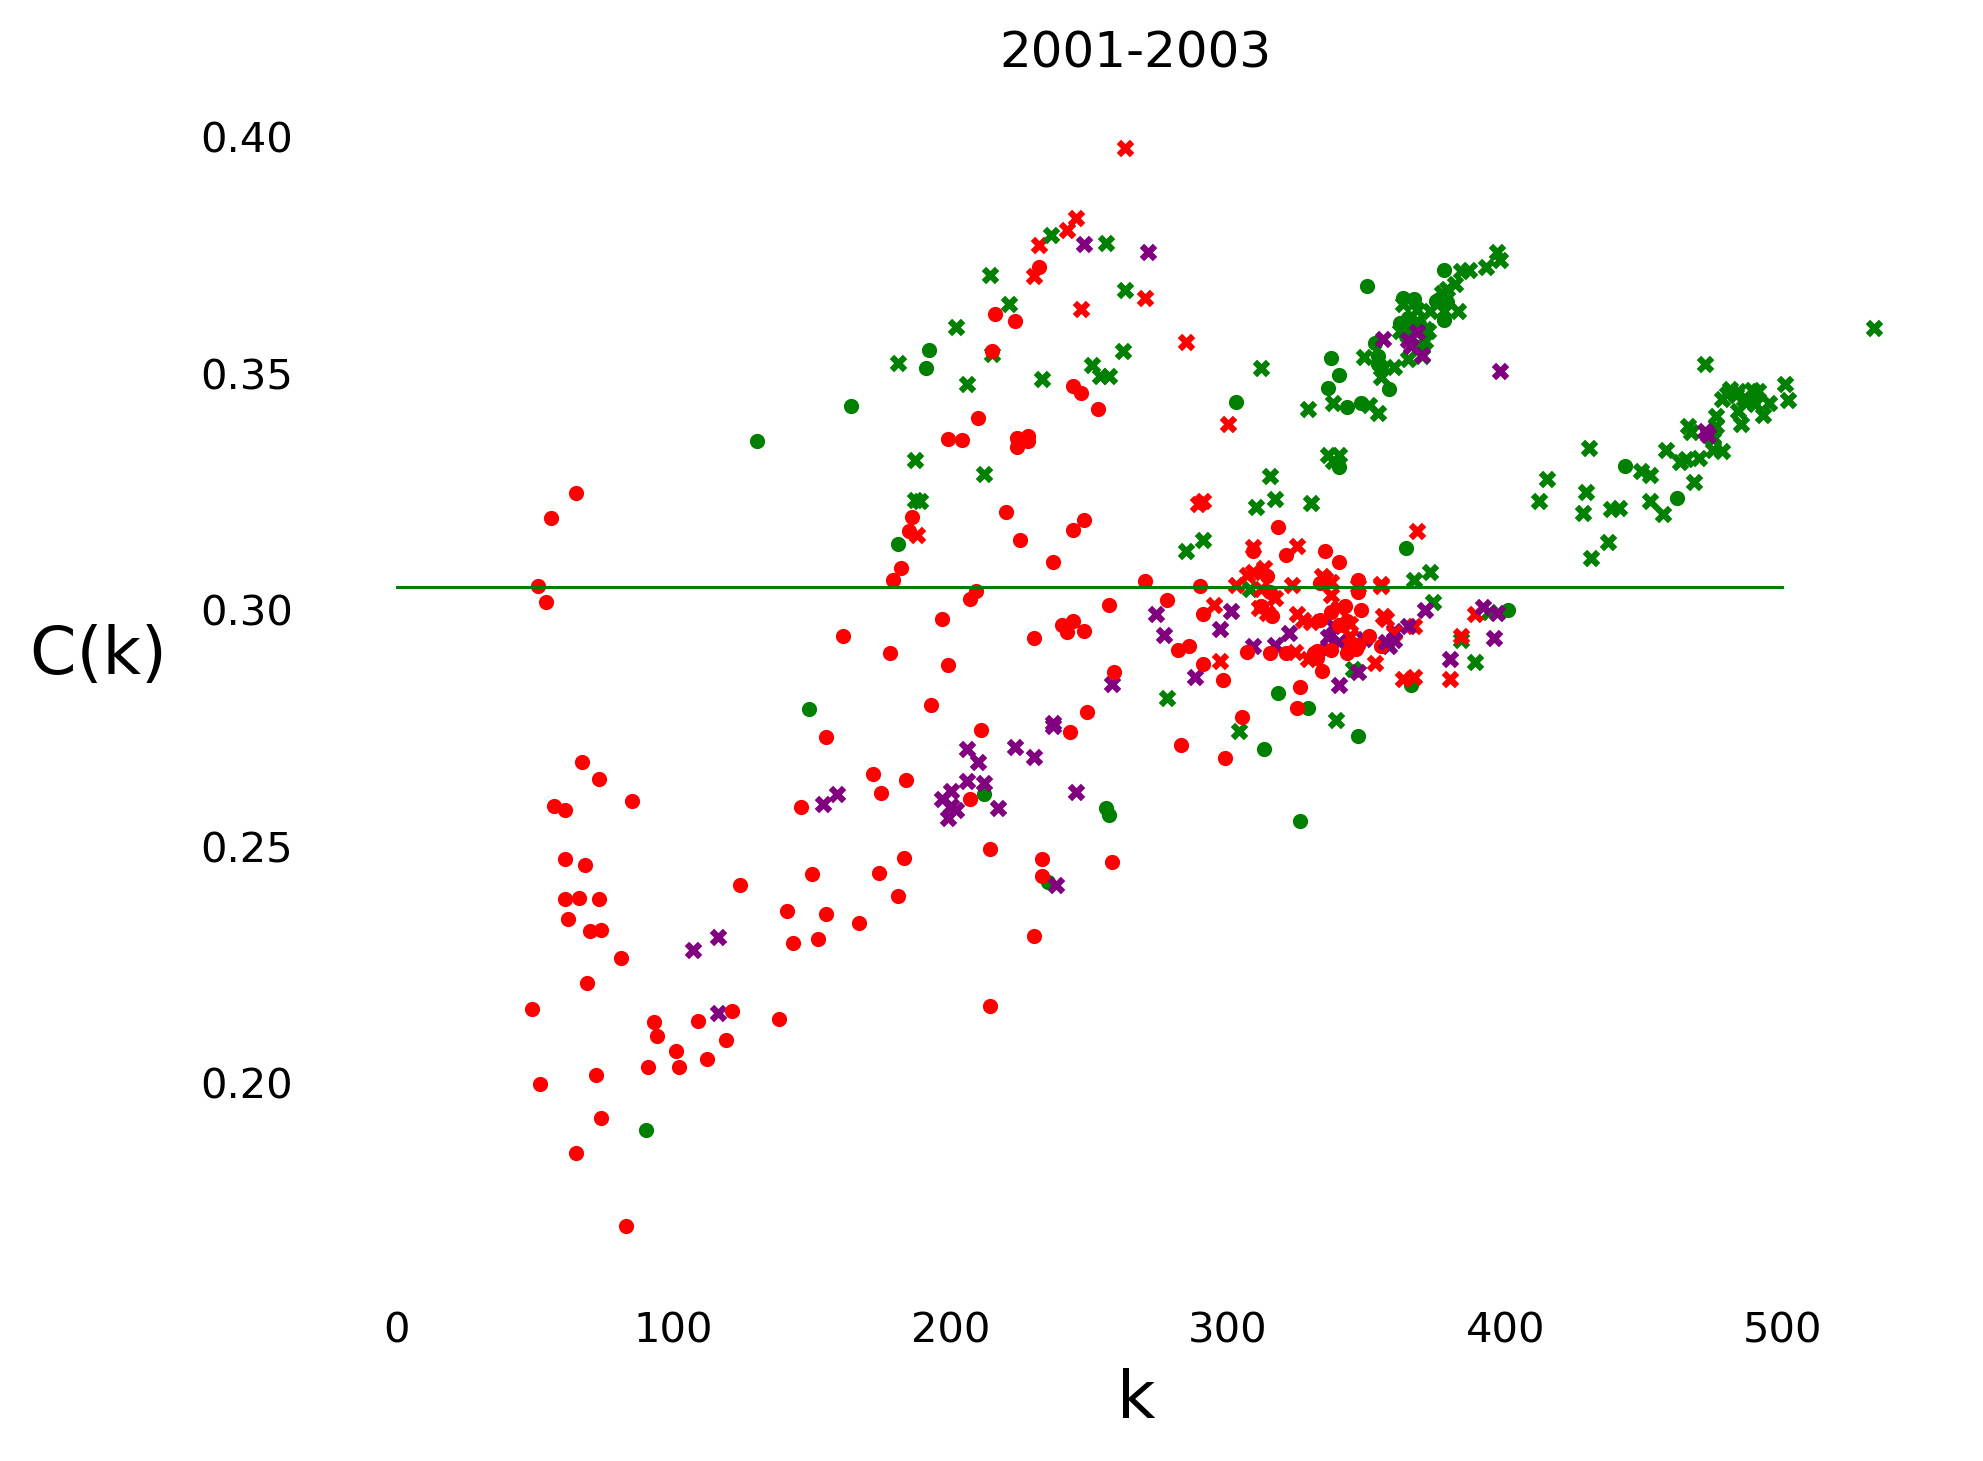

In [12]:
# Figure 2
targetWrite=targetDict[target]

carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]

NA=pickle.load(open("{}/NAShrink.pickle".format(target),"rb"))
label=['Serious','Severe','Extreme']



NACodeE=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in NA.keys() if NA[i].split('-')[0] in label]
NACode=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in NA.keys()]



plt.close()
plt.figure(figsize=(7, 5.25),dpi=300)    
plt=setplot(plt)
N=len(degree)
count=0
for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,500,color='g',linewidth=0.3)
    state=int(county.split('-')[0])
    countyName=int(county.split('-')[1])
    naSize=10
    if state in carbA:   
        if str(state)+'-'+str(countyName) in NACodeE:
            plt.scatter(k,cc,s=naSize,marker='x',color='red')      
        else:
            plt.scatter(k,cc,color='red',s=7)         
    elif state in carbB:
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(k,cc,s=naSize,marker='x',color='green')   
        else:
            plt.scatter(k,cc,color='green',s=7)
    else:
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(k,cc,s=naSize,marker='x',color='purple')
        else:
            pass
            #plt.scatter(k,cc,color='purple',s=7)
    

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)

print(count)
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
plt.title(targetWrite)
plt.savefig("NA/analysis/1/c_{}.png".format(targetWrite),bbox_inches='tight')
plt.show()

In [13]:
# 10th P, 90th P, Median, Mean, Max, Min
conc=pickle.load(open("{}/NAConcentration.pickle".format(target),"rb"))

plt.close()
plt.figure(figsize=(10, 7.5),dpi=300)    
plt=setplot(plt)
N=len(degree)
count=0
for key in degree:
    county=key[0]
    k=int(key[1])
    o3Conc=conc[county][1]
    #print(o3Conc)
    cc=cluster[county]
    plt.hlines(0.070,0,500,color='g',linestyles='--',linewidth=0.1)
    #plt.hlines(Cavg,0,500,color='g',)
    state=int(county.split('-')[0])
    countyName=int(county.split('-')[1])
    x,y=k,o3Conc
    naSize=10
    if state in carbA:   
        if str(state)+'-'+str(countyName) in NACodeE:
            plt.scatter(x,y,s=naSize,marker='x',color='red')      
        else:
            plt.scatter(x,y,color='red',s=7)         
    elif state in carbB:
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(x,y,s=naSize,marker='x',color='green')   
        else:
            plt.scatter(x,y,color='green',s=7)
    else:
        if str(state)+'-'+str(countyName) in NACode:
            plt.scatter(x,y,s=naSize,marker='x',color='purple')
        else:
            pass
            #plt.scatter(k,cc,color='purple',s=7)
  

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)

print(count)
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('ppm        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
plt.title(targetWrite)
plt.savefig("NA/analysis/2/o3_{}.png".format(targetWrite),bbox_inches='tight')
plt.show()

KeyError: '80-2-14'

In [237]:
f=open("ozoneNonattainment.txt","r")
l=f.readline()
print(l.strip().split('\t'))

['ARIZONA', 'Gila County', 'Phoenix-Mesa, AZ', 'Part', '56', '04/007']


In [16]:
# NA Intersection

files=['1987-1989','2001-2003','2008-2010','2014-2016']

label=['Serious','Extreme']
countyList=set()
for file in files:
    f=open('NA/files/NA{}.tsv'.format(file))
    temp=set()
    for l in f:
        row=l.split('\t')
        if row[-2].split('-')[0] in label:
            temp.add(row[0])
    print(len(countyList),len(temp))
    if files.index(file)==0:
        countyList=temp
    else:
        countyList=countyList.intersection(temp)
        print('ok')
pickle.dump(countyList,open('NA/commonNA-ES.pickle','wb'))        
        

0 15
15 5
ok
3 5
ok
2 4
ok


In [15]:
len(countyList)

2

{'Atlanta, GA',
 'Baltimore, MD',
 'Columbus, OH',
 'Dallas-Fort Worth, TX',
 'Greater Connecticut, CT',
 'Houston-Galveston-Brazoria, TX',
 'Los Angeles-South Coast Air Basin, CA',
 'Sacramento Metro, CA',
 'San Francisco Bay Area, CA',
 'San Joaquin Valley, CA',
 'Washington, DC-MD-VA'}